In [12]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
path = 'D:\\processing\\OTHER_PLATFORMS'
f_mod = '15860000_MOD09Q1_commun_noinf.xls'
f_myd = '15860000_MYD09Q1_commun_noinf.xls'
f_vir = '15860000_VNP09H1_commun_noinf.xls'
f_s3 = 'D:\\processing\\win\\MADEIRAv9b.xlsx'

df_mod = pd.read_excel(os.path.join(path,f_mod),sheet_name='MOD09Q1')
df_myd = pd.read_excel(os.path.join(path,f_myd),sheet_name='MYD09Q1')
df_vir = pd.read_excel(os.path.join(path,f_vir),sheet_name='Report')
df_s3 = pd.read_excel(f_s3,sheet_name='MADEIRAv9b')

In [133]:
df_myd['Date'][0:2]

0    2002-07-04 00:00:00
1    2002-07-12 00:00:00
Name: Date, dtype: object

In [134]:
df_mod['Date'][0:2]

0    2000-02-26 00:00:00
1    2000-03-05 00:00:00
Name: Date, dtype: object

In [135]:
df_mod['Date'] = pd.to_datetime(df_mod['Date'])
df_mod['Date'][0:2]

0   2000-02-26
1   2000-03-05
Name: Date, dtype: datetime64[ns]

In [122]:
df_vir['Date'][0:2]

0   2012-01-17
1   2012-01-25
Name: Date, dtype: datetime64[ns]

In [136]:
df_s3['Datetime'][0:2]

0   2016-05-14 13:49:52
1   2016-05-18 13:46:11
Name: Datetime, dtype: datetime64[ns]

In [119]:
df_vir['Date'] = pd.to_datetime(df_vir['Date'])
# df_vir['Date'] = df_vir.Date.to_pydatetime()
# df_vir['Date'] = df_vir['Date'].applymap(to_pydatetime)
# df_vir['Date'][0:5]

In [124]:
df_vir['Date'][0]

Timestamp('2012-01-17 00:00:00')

In [43]:
df_vir['Date'][0].to_pydatetime()

datetime.datetime(2012, 1, 17, 0, 0)

In [45]:
len(df_vir['Date'])

373

In [46]:
dtlist = []
for i in df_vir['Date']:
    dtlist.append(i.to_pydatetime())

In [47]:
dtlist[0:5]

[datetime.datetime(2012, 1, 17, 0, 0),
 datetime.datetime(2012, 1, 25, 0, 0),
 datetime.datetime(2012, 2, 2, 0, 0),
 datetime.datetime(2012, 10, 2, 0, 0),
 datetime.datetime(2012, 2, 18, 0, 0)]

In [48]:
df_vir['Date'][0:5]

0   2012-01-17
1   2012-01-25
2   2012-02-02
3   2012-10-02
4   2012-02-18
Name: Date, dtype: datetime64[ns]

In [49]:
df_vir['Date'] = dtlist

In [81]:
df_vir['Date'].min()

Timestamp('2012-01-06 00:00:00')

In [51]:
print(len(df_mod))
df_mod_m = df_mod.set_index('Date').reindex(index = df_vir['Date'])
print(len(df_mod_m))

912
373


In [52]:
print(len(df_myd))
df_myd_m = df_myd.set_index('Date').reindex(index = df_vir['Date'])
print(len(df_myd_m))

810
373


In [66]:
df_vir_m = df_vir.set_index('Date')

In [105]:
print(df_vir_m.index.min())
print(df_vir_m.index.max())

2012-01-06 00:00:00
2020-10-02 00:00:00


In [60]:
df_mod_m.head()

,Nom,Bande rouge estimee,Bande IR estimee,ecarttype bande rouge estimee,ecarttype bande IR estimee,reflectance Bande rouge initiale,reflectance Bande IR initiale,taille cluster,vzen,std(vzen),numero scenario,sunglint,pourcentage pixel valides,bande qualite 500m,taille cluster/taillepixelvalide,flag qualite,Unnamed: 17,reason for flag quality <> 1
Date,,,,,,,,,,,,,,,,,,
2012-01-17,15860000_mod09q1_a2012017_006.hdf,0.000000,0.000000,NaN,NaN,1853.7273,2403.2727,0.0,0.000000,0.000000,-1.0,0.000000,0.0,1.0,0.000000,0.0,NaN,estimated Red band=0;
2012-01-25,15860000_mod09q1_a2012025_006.hdf,0.000000,0.000000,NaN,NaN,1441.8667,1778.2000,0.0,0.000000,0.000000,-1.0,0.000000,1.0,1.0,0.000000,0.0,NaN,estimated Red band=0;
2012-02-02,15860000_mod09q1_a2012033_006.hdf,1640.126087,1253.973913,44.119864,39.765062,1680.6029,1669.5635,230.0,23.359826,0.105055,1.0,8.228029,16.0,1.0,37.891269,3.0,NaN,sunglint < 20 and estimated IR band > 1000;
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-18,15860000_mod09q1_a2012049_006.hdf,1435.176829,1082.365854,36.775161,28.475097,1426.5245,1453.9279,328.0,7.535610,13.769722,1.0,35.263550,62.0,1.0,14.506855,1.0,NaN,NaN


In [85]:
df_myd_m.head()

,Nom,Bande rouge estimee,Bande IR estimee,ecarttype bande rouge estimee,ecarttype bande IR estimee,reflectance Bande rouge initiale,reflectance Bande IR initiale,taille cluster,vzen,std(vzen),...,pourcentage pixel valides,bande qualite 500m,taille cluster/taillepixelvalide,flag qualite,Unnamed: 17,reason for flag quality <> 1,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-17,15860000_myd09q1_a2012017_006.hdf,1482.803828,1032.497608,56.275253,55.774677,1534.8401,1533.6263,209.0,37.275024,4.494405,...,14.0,1.0,38.847584,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-02,15860000_myd09q1_a2012033_006.hdf,0.000000,0.000000,NaN,NaN,1844.5600,1584.9600,0.0,0.000000,0.000000,...,0.0,1.0,0.000000,0.0,NaN,estimated Red band=0;,NaN,NaN,NaN,NaN
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-18,15860000_myd09q1_a2012049_006.hdf,1569.376891,1111.980743,46.758485,36.470744,1528.7332,1340.1592,727.0,18.206327,9.078223,...,39.0,1.0,51.197183,1.0,NaN,NaN,NaN,NaN,NaN,NaN


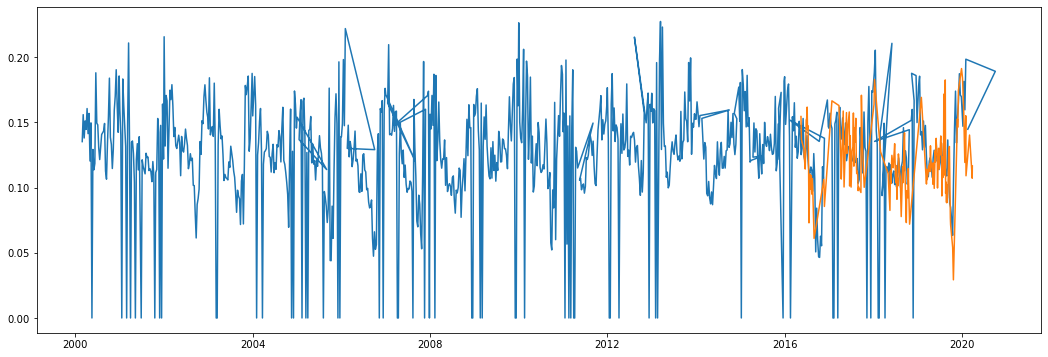

In [137]:
plt.rcParams['figure.figsize'] = [18, 6]
fig = plt.figure()
ax = plt.axes()
# ax.plot(df_mod_m['Bande rouge estimee']/10000,label='MODIS Terra')
# ax.plot(df_myd_m['Bande rouge estimee']/10000,label='MODIS Aqua')
# ax.plot(df_vir_m['Bande rouge estimee']/10000,label='VIIRS')
ax.plot(df_mod['Date'],df_mod['Bande rouge estimee']/10000,label='MODIS')
ax.plot(df_s3['Datetime'],df_s3['B8-665'],label='Sentinel-3')

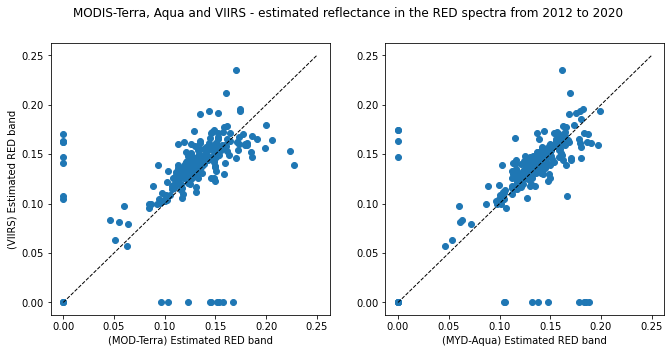

In [111]:
plt.rcParams['figure.figsize'] = [11, 5]
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('MODIS-Terra, Aqua and VIIRS - estimated reflectance in the RED spectra from 2012 to 2020')

ax1.scatter(df_mod_m['Bande rouge estimee']/10000,df_vir_m['Bande rouge estimee']/10000)
ax1.plot([-0.0, 0.25], [-0.0, 0.25], 'k-', linewidth=1, linestyle='dashed')
ax1.set_xlabel('(MOD-Terra) Estimated RED band')
ax1.set_ylabel('(VIIRS) Estimated RED band')

ax2.scatter(df_myd_m['Bande rouge estimee']/10000,df_vir_m['Bande rouge estimee']/10000)
ax2.plot([-0.0, 0.25], [-0.0, 0.25], 'k-', linewidth=1, linestyle='dashed')
ax2.set_xlabel('(MYD-Aqua) Estimated RED band')
# ax2.set_ylabel('(MYD-Aqua) Estimated RED band')

# ax.set_xlim(-0.02, 0.2)
# ax.set_ylim(-0.02, 0.2)
plt.savefig('mod_vs_myd_vs_viirs', dpi=100)

Text(0, 0.5, '(VIIRS) Estimated RED band')

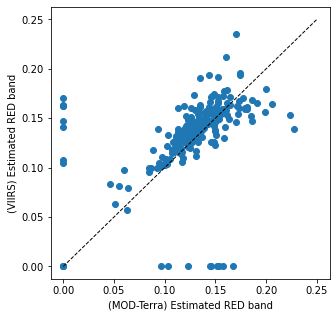

In [97]:
plt.rcParams['figure.figsize'] = [5, 5]
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_mod_m['Bande rouge estimee']/10000,df_vir_m['Bande rouge estimee']/10000)
ax.plot([-0.0, 0.25], [-0.0, 0.25], 'k-', linewidth=1, linestyle='dashed')
ax.set_xlabel('(MOD-Terra) Estimated RED band')
ax.set_ylabel('(VIIRS) Estimated RED band')

# ax.set_xlim(-0.02, 0.2)
# ax.set_ylim(-0.02, 0.2)
# plt.savefig('mod_vs_viirs', dpi=100)

In [92]:
mod_m_red = df_mod_m['Bande IR estimee']
myd_m_red = df_myd_m['Bande IR estimee']

In [93]:
mod_m_red.corr(myd_m_red)

0.5730785285408282